In [7]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
fec = pd.read_csv('./src/fec.csv')
fec

C:\Users\PC\AppData\Local\Temp\ipykernel_7004\672728105.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec = pd.read_csv('./src/fec.csv')


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678


In [43]:
fec['cand_nm'].value_counts()

cand_nm
Obama, Barack                     593746
Paul, Ron                         143757
Romney, Mitt                      107229
Gingrich, Newt                     47679
Santorum, Rick                     46559
Cain, Herman                       20107
Perry, Rick                        13575
Bachmann, Michelle                 13140
Roemer, Charles E. 'Buddy' III      5920
Pawlenty, Timothy                   4555
Huntsman, Jon                       4156
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  74
Name: count, dtype: int64

In [44]:
RvsO = fec[(fec['cand_nm'] == 'Obama, Barack') | (fec['cand_nm'] == 'Romney, Mitt')]
ro = RvsO[['cand_nm', 'contbr_occupation', 'contb_receipt_amt']]
# contbr_occupation	  contb_receipt_amt	
ro['contbr_occupation'].value_counts()

contbr_occupation
RETIRED                                   177897
ATTORNEY                                   30219
INFORMATION REQUESTED                      24785
HOMEMAKER                                  19742
PHYSICIAN                                  17259
                                           ...  
ASSSISTANT PROFESSOR                           1
C.C.D.O.                                       1
SENIOR INTERNATIONAL CORRECTIONS ADVIS         1
OPERATOR TECHNICIAN/UNION OFFICAL              1
COMPLIANCE ANALYST, STATE GOVERNMENT           1
Name: count, Length: 33605, dtype: int64

In [45]:
tmp = ro.groupby(['contbr_occupation'], as_index=False).sum().sort_values(by='contb_receipt_amt',ascending=False)
tmp

,contbr_occupation,cand_nm,contb_receipt_amt
25367,RETIRED,"Romney, MittRomney, MittRomney, MittRomney, Mi...",36537456.46
2190,ATTORNEY,"Romney, MittRomney, MittRomney, MittRomney, Mi...",16429511.79
14073,HOMEMAKER,"Romney, MittRomney, MittRomney, MittRomney, Mi...",12280645.16
14845,INFORMATION REQUESTED PER BEST EFFORTS,"Romney, MittRomney, MittRomney, MittRomney, Mi...",11173374.84
21221,PHYSICIAN,"Romney, MittRomney, MittRomney, MittRomney, Mi...",5065383.78
...,...,...,...
29852,SURGERY SCHEDULER,"Romney, MittRomney, MittRomney, MittRomney, Mitt",0.00
30557,TECHNICAL SUPPORT REPRESENTATIVE,"Obama, BarackObama, Barack",0.00
24642,REFRIGERATION TRAINING \t,"Obama, Barack",-50.00
18318,METAL SMITH,"Obama, BarackObama, BarackObama, BarackObama, ...",-4225.00


In [46]:
result = tmp[:20]
result

,contbr_occupation,cand_nm,contb_receipt_amt
25367,RETIRED,"Romney, MittRomney, MittRomney, MittRomney, Mi...",36537456.46
2190,ATTORNEY,"Romney, MittRomney, MittRomney, MittRomney, Mi...",16429511.79
14073,HOMEMAKER,"Romney, MittRomney, MittRomney, MittRomney, Mi...",12280645.16
14845,INFORMATION REQUESTED PER BEST EFFORTS,"Romney, MittRomney, MittRomney, MittRomney, Mi...",11173374.84
21221,PHYSICIAN,"Romney, MittRomney, MittRomney, MittRomney, Mi...",5065383.78
14844,INFORMATION REQUESTED,"Obama, BarackObama, BarackObama, BarackObama, ...",4849801.96
21907,PRESIDENT,"Romney, MittRomney, MittRomney, MittRomney, Mi...",4281449.72
6295,CONSULTANT,"Romney, MittRomney, MittRomney, MittRomney, Mi...",3864389.65
10838,EXECUTIVE,"Romney, MittRomney, MittRomney, MittRomney, Mi...",3585814.84
16214,LAWYER,"Romney, MittRomney, MittRomney, MittRomney, Mi...",3167097.07


In [49]:
sns.barplot(result, x='contbr_occupation', y='contb_receipt_amt', hue='cand_nm')

<Axes: xlabel='contbr_occupation', ylabel='contb_receipt_amt'>

ValueError: Image size of 18734992x486 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [19]:
tmp = ro.groupby(['cand_nm', 'contbr_occupation']).sum()
tmp


cand_nm        contbr_occupation                  
Obama, Barack     MIXED-MEDIA ARTIST / STORYTELLER     100.0
                AREA VICE PRESIDENT                    250.0
                RESEARCH ASSOCIATE                     100.0
                TEACHER                                500.0
                THERAPIST                             3900.0
                                                       ...  
Romney, Mitt   YACHT CONSTRUCTION                     2500.0
               YOGA INSTRUCTOR                         500.0
               YOGA TEACHER                           2500.0
               YOUTH CARE WORKER                        25.0
               YOUTH OUTREACH DIRECTOR                1000.0
Name: contb_receipt_amt, Length: 35991, dtype: float64

In [53]:
pt = ro.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='cand_nm', aggfunc='sum')
pt

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZEPPOS AND ASSOCIATES,1000.0,NaN
ZONE MANAGER,135.0,NaN
ZOOKEEPER,35.0,NaN


# 답안

In [56]:
by_occu = RvsO.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='cand_nm', aggfunc='sum')
by_occu

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZEPPOS AND ASSOCIATES,1000.0,NaN
ZONE MANAGER,135.0,NaN
ZOOKEEPER,35.0,NaN


<Axes: ylabel='contbr_occupation'>

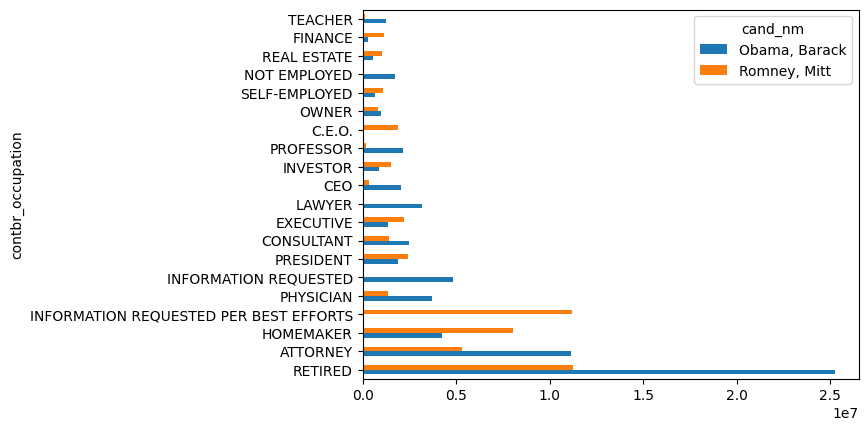

In [65]:
top20 = by_occu.sum(axis=1).sort_values(ascending=False)[:20].index
by_occu.loc[top20].plot(kind='barh')